<a href="https://colab.research.google.com/github/jacobiancosine/jacobiancosine/blob/almost-final/Capstone_2023_rev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data File. Initial EDA

In [1]:
#loading up everything that is needed.
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
#access personal drive for data.
#uncommit next two lines when working in collab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#turn csv into dataframe
games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

#local file
#games = pd.read_csv('games.csv')

In [4]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# EDA

In [5]:
games.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.858100e+04,78581.000000,78581.000000,78581.000000,78581.000000,78581.000000,78581.000000,7.858100e+04,78581.000000,44.000000,78581.000000,7.858100e+04,78581.000000,78581.000000,78581.000000,78581.000000
mean,1.266629e+06,138.883051,0.329253,7.104333,0.573625,3.591861,0.043127,1.028846e+03,170.194653,98.909091,20.723165,8.295522e+02,112.196409,11.210954,99.838765,12.011020
std,6.402733e+05,5577.198496,2.311860,11.049926,14.268964,15.938915,1.863819,2.534235e+04,4755.704133,0.857747,178.311718,1.861140e+04,1187.518506,195.629768,1571.243342,212.201878
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.315100e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.239050e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,8.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.791680e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.200000e+01,16.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.546410e+06,872138.000000,21.000000,999.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [6]:
#check for duplicated
games.duplicated().sum()

0

In [7]:
#info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   About the game              75646 non-null  object 
 9   Supported languages         78581 non-null  object 
 10  Full audio languages        78581 non-null  object 
 11  Reviews                     9518 non-null   object 
 12  Header image                78581 non-null  object 
 13  Website                     375

In [8]:
games.isnull().sum().sort_values()

AppID                             0
Median playtime two weeks         0
Median playtime forever           0
Average playtime two weeks        0
Average playtime forever          0
Recommendations                   0
Achievements                      0
Negative                          0
Positive                          0
User score                        0
Linux                             0
Mac                               0
Windows                           0
Metacritic score                  0
Required age                      0
Header image                      0
Full audio languages              0
Supported languages               0
DLC count                         0
Price                             0
Release date                      0
Peak CCU                          0
Estimated owners                  0
Name                              6
Screenshots                    1640
Genres                         2926
About the game                 2935
Developers                  

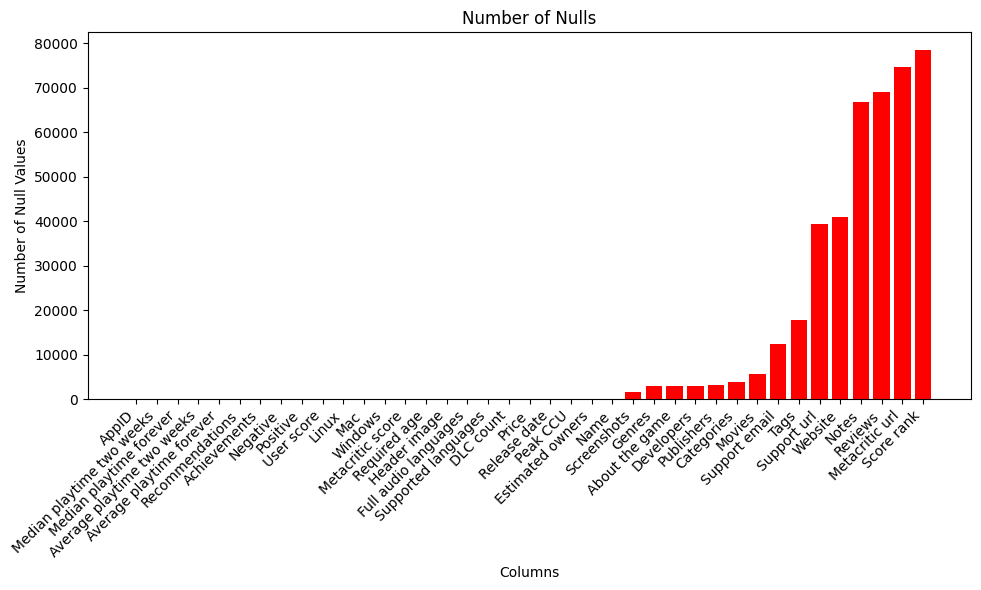

In [9]:
#display nulls as a graph

null_counts = games.isnull().sum().sort_values() # sort values in ascending order


plt.figure(figsize=(10,6))
plt.bar(null_counts.index, null_counts.values, color = 'red')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Nulls')
plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
plt.tight_layout()
plt.show()

**Columns to keep for sure even though we have some nulls:**

*   Genres
*   Developers
*   Publishers
*   Tags

**Columns to review for dropping:**

*   Screenshots
*   About the Game
*   Movies
*   Support Emails
*   Support url
*   Website
*   Notes
*   Review
*   Metacritic url
*   Scorerank




In [10]:
#let's look at the nulls a little be closer

null_threshold = 6

columns_nulls = games.columns[games.isnull().sum() > null_threshold].tolist()

#need to be careful. It looks like 'Genre', 'Categories' and 'Tags' are needed.

In [11]:
columns_nulls

['About the game',
 'Reviews',
 'Website',
 'Support url',
 'Support email',
 'Metacritic url',
 'Score rank',
 'Notes',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [12]:
# can drop. Might be interesting to do an analysis on this word bubble in a different analysis
games['About the game'].unique

<bound method Series.unique of 0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
2        Jolt Project: The army now has a new robotics ...
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
                               ...                        
78576    Welcome to Desert Spirit Grave (DSG), an immer...
78577    On our Steam discussion boards you will find m...
78578    Протяжный скрип старых лагерных ворот эхом раз...
78579    A treacherous visual novel about friendship, d...
78580    Kayra's nightmare has come true! The evil, lef...
Name: About the game, Length: 78581, dtype: object>

In [13]:
# can drop
games['Screenshots'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_3f370f69eef0caeceb533d06925cc48f0f26c83c.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_3fcd62a2831bcc1e557a0fe2a061b6369ba030d1.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_06a2446b7ccef5eaac1ef4200acdb3f02dac9ae0.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_794a3ecd4ae51313f8cfffbc6b3d8b91c665b12b.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_8907e0a624a1113be01fa1b426d0e3ab0971e7d2.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_191adc1f11bf9d13498cb411ac71f29221732e86.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_04b30aaa0ce083b1bcff63d06432707ab9c35c74.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_7496de2518ddb1b58db0004d1386b4e48c442367.1920x1080.jpg?t=1644931091,https://

In [14]:
#split dataframe
games_with_nulls = games[columns_nulls]
games_without_nulls = games.drop(columns=columns_nulls)

In [15]:
games_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   Supported languages         78581 non-null  object 
 9   Full audio languages        78581 non-null  object 
 10  Header image                78581 non-null  object 
 11  Windows                     78581 non-null  bool   
 12  Mac                         78581 non-null  bool   
 13  Linux                       785

In [16]:
games_with_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   About the game  75646 non-null  object 
 1   Reviews         9518 non-null   object 
 2   Website         37575 non-null  object 
 3   Support url     39140 non-null  object 
 4   Support email   66219 non-null  object 
 5   Metacritic url  3878 non-null   object 
 6   Score rank      44 non-null     float64
 7   Notes           11728 non-null  object 
 8   Developers      75625 non-null  object 
 9   Publishers      75380 non-null  object 
 10  Categories      74654 non-null  object 
 11  Genres          75655 non-null  object 
 12  Tags            60881 non-null  object 
 13  Screenshots     76941 non-null  object 
 14  Movies          72845 non-null  object 
dtypes: float64(1), object(14)
memory usage: 9.0+ MB


#  Review columns to see which I really don't need.

In [17]:
# can drop
games['Support email'].value_counts()

info@bigfishgames.com                             325
mikhail.zverev@8floor.net                         268
business@atomicfabrik.com                         186
contact@exosyphenstudios.com                      153
support@quanticlab.com                            148
                                                 ... 
support@systemic-games.com                          1
info@primegames.bg                                  1
info@escaperealityuk.space                          1
support-deathcollector-steam@choiceofgames.com      1
witchcraftvidgame@gmail.com                         1
Name: Support email, Length: 39022, dtype: int64

In [18]:
# can drop
games['Score rank'].value_counts()

99.0     18
98.0     12
100.0    12
97.0      2
Name: Score rank, dtype: int64

In [19]:
# can drop
games['Notes'].value_counts()

This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                        106
Nakedness. All characters appearing in this game are over 18 years of age.                                                                                                                                                          101
-Nudity or sexual content -Not suitable for watching at work -Not suitable for all ages -All characters in the game are over 18 years old                                                                                            57
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content                                                                          42
This game contains the following sexual content ・Strong language ・Sexual

**Columns to be dropped will be the following:**

* 'About the game'
* 'Reviews'
* 'Website'
* 'Support url'
* 'Support email'
* 'Metacritic url'
* 'Score rank'
* 'Notes'
* 'Screenshots'
* 'Movies'

These columns are mostly text and will not apply to the analysis to be done.




In [20]:
#columns that would be need to be dropped.
drop_me =  ['About the game', 'Reviews', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies']

In [21]:
#dropping unneccessary columns
games = games.drop(columns = drop_me)

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   Supported languages         78581 non-null  object 
 9   Full audio languages        78581 non-null  object 
 10  Header image                78581 non-null  object 
 11  Windows                     78581 non-null  bool   
 12  Mac                         78581 non-null  bool   
 13  Linux                       785

In [23]:
# can drop
games['Header image'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/header.jpg?t=1644931091     20
https://cdn.akamai.steamstatic.com/steam/apps/24010/header.jpg?t=1658409119       5
https://cdn.akamai.steamstatic.com/steam/apps/359550/header.jpg?t=1655223333      5
https://cdn.akamai.steamstatic.com/steam/apps/37960/header.jpg?t=1447352428       4
https://cdn.akamai.steamstatic.com/steam/apps/18430/header.jpg?t=1447351615       3
                                                                                 ..
https://cdn.akamai.steamstatic.com/steam/apps/1971510/header.jpg?t=1650969228     1
https://cdn.akamai.steamstatic.com/steam/apps/1020360/header.jpg?t=1587457888     1
https://cdn.akamai.steamstatic.com/steam/apps/20710/header.jpg?t=1499419184       1
https://cdn.akamai.steamstatic.com/steam/apps/1423610/header.jpg?t=1637609296     1
https://cdn.akamai.steamstatic.com/steam/apps/1745050/header.jpg?t=1693521116     1
Name: Header image, Length: 78475, dtype: int64

In [24]:
# can drop
games['Full audio languages'].value_counts()

[]                                                                                                                                                                     45465
['English']                                                                                                                                                            18522
['English', 'Russian']                                                                                                                                                  1235
['English', 'Simplified Chinese']                                                                                                                                       1075
['Simplified Chinese']                                                                                                                                                   878
                                                                                                                                       

In [25]:
# can drop
games['DLC count'].value_counts()

0       67239
1        7267
2        1794
3         685
4         381
        ...  
87          1
114         1
149         1
260         1
1968        1
Name: DLC count, Length: 94, dtype: int64

In [26]:
#can drop? keep
games['Achievements'].value_counts()

0       39551
10       1967
12       1537
20       1401
15       1288
        ...  
1337        1
219         1
1043        1
764         1
412         1
Name: Achievements, Length: 429, dtype: int64

In [27]:
#can drop
games['Recommendations'].value_counts()

0        65213
116         66
106         64
101         60
105         58
         ...  
41402        1
6114         1
3159         1
81882        1
14241        1
Name: Recommendations, Length: 3991, dtype: int64

In [28]:
#dropping additional columns
#12-6-2023 droppign the playtime. These metric are recorded after the fact a game is bought already.

drop_me_too =['Header image','Full audio languages','Supported languages','Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks' ]

In [29]:
#dropping unneccessary columns part two
games = games.drop(columns = drop_me_too)

In [30]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,User score,Positive,Negative,Achievements,Recommendations,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,6,11,30,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,53,5,12,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,50,8,17,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [31]:
games.shape

(78581, 22)

In [32]:
#getting rid of nulls
games.dropna(inplace = True)

In [33]:
games.shape

(59649, 22)

In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59649 entries, 0 to 78580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             59649 non-null  int64  
 1   Name              59649 non-null  object 
 2   Release date      59649 non-null  object 
 3   Estimated owners  59649 non-null  object 
 4   Peak CCU          59649 non-null  int64  
 5   Required age      59649 non-null  int64  
 6   Price             59649 non-null  float64
 7   DLC count         59649 non-null  int64  
 8   Windows           59649 non-null  bool   
 9   Mac               59649 non-null  bool   
 10  Linux             59649 non-null  bool   
 11  Metacritic score  59649 non-null  int64  
 12  User score        59649 non-null  int64  
 13  Positive          59649 non-null  int64  
 14  Negative          59649 non-null  int64  
 15  Achievements      59649 non-null  int64  
 16  Recommendations   59649 non-null  int64 

# Dealing with genres

In [35]:
games['Tags'].head()

0                          Indie,Casual,Sports,Bowling
1    Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...
3    2D Platformer,Atmospheric,Surreal,Mystery,Puzz...
4    Indie,Adventure,Nudity,Violent,Sexual Content,...
5    Turn-Based Combat,Massively Multiplayer,Multip...
Name: Tags, dtype: object

In [36]:
#check for nulls
games['Genres'].isnull().sum()

0

In [37]:
games['Categories'].nunique()

5171

In [38]:
games['Categories'].value_counts().head(500)

Single-player                                                                                                                             15706
Single-player,Steam Achievements                                                                                                           6085
Single-player,Steam Achievements,Steam Cloud                                                                                               2325
Single-player,Partial Controller Support                                                                                                   2010
Single-player,Full controller support                                                                                                      1672
                                                                                                                                          ...  
Single-player,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud,Remote Play on Phone,Remote Play on Tablet     

In [39]:
#spliting tool --not needed?
def string_split(column):
  list_genre = column.split(",")
  return list_genre

# code to break down Genres, Tags and Categories

In [40]:
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [41]:
genre_count

{'Casual': 23861,
 'Indie': 43155,
 'Sports': 2861,
 'Action': 25969,
 'Adventure': 23660,
 'Free to Play': 3455,
 'Massively Multiplayer': 1533,
 'RPG': 10605,
 'Strategy': 11927,
 'Simulation': 11856,
 'Early Access': 7148,
 'Racing': 2316,
 'Sexual Content': 105,
 'Nudity': 116,
 'Violent': 512,
 'Gore': 304,
 'Animation & Modeling': 124,
 'Design & Illustration': 145,
 'Utilities': 242,
 'Game Development': 59,
 'Web Publishing': 38,
 'Audio Production': 59,
 'Video Production': 67,
 'Education': 96,
 'Software Training': 52,
 'Accounting': 7,
 'Photo Editing': 27,
 'Movie': 2,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

## Looking at Genre I'm going to remove everything that doesn't specifically describe a genre.


### removing the following:
* 'Sexual Content': 105,
* 'Nudity': 116,
* 'Violent': 512,
* 'Gore': 304,
* 'Animation & Modeling': 125,
* 'Design & Illustration': 146,
* 'Utilities': 247,
* 'Game Development': 62,
* 'Web Publishing': 38,
* 'Audio Production': 60,
* 'Video Production': 68,
* 'Education': 97,
* 'Software Training': 52,
* 'Accounting': 7,
* 'Photo Editing': 29,
* 'Movie': 2,
* 'Documentary': 1,
* 'Episodic': 1,
* 'Short': 1,
* 'Tutorial': 1,
* '360 Video': 1}

# Expirement to check for values in genre

In [42]:
values_to_check = ['360 Video', 'Tutorials']


In [43]:
values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [44]:
#code to remove genres that I don't need
values_to_check = ['360 Video', 'Tutorials']

values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [45]:
#code to check for values in games_test3
games['Remove'] = games['Genres'].apply(lambda x: any([k in x for k in values_to_remove]))

# Function to check for a value and add one to a specific column
#create a look for each of its tags and genre only


In [46]:
#list of col and values to check for each of the

#this approach is too broad and causing everything to be marked as true. breaking it down by genr, tags, and categories.
col_add_fin = ['Casual','Colorful','Cross-Platform Multiplayer','Remote Play on TV','Steam Workshop','Adventure','Simulation','2D','Funny','Arcade','RPG','Indie','Remote Play on Tablet','Fantasy','Story Rich','Includes level editor','Free to Play','3D','Puzzle','Steam Leaderboards','PvP','Exploration','Multi-player','Shared/Split Screen','Early Access', 'Shared/Split Screen PvP', 'Single-player','Steam Achievements','Pixel Graphics','Shooter','Full controller support','Shared/Split Screen Co-op','Captions available','Steam Trading Cards','Action','Partial Controller Support','Cute','Racing','Remote Play Together','MMO','Strategy','First-Person','Stats','Massively Multiplayer','Online PvP','Steam Cloud','Singleplayer','Co-op','Retro','Atmospheric','Multiplayer','In-App Purchases','Sports','Online Co-op']


In [47]:
#tags


In [48]:
#genres

gen_add =['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Free to Play','Massively Multiplayer','RPG','Strategy','Simulation','Early Access','Racing']

In [93]:
#categories


In [94]:
#sample df to mess witht to add col too
games_all_col = games_test_clean_genre.copy()

In [110]:
#lets put in all the col
add_columns(games_all_col, col_add_fin)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Stats,Online PvP,Steam Cloud,Singleplayer,Co-op,Retro,Atmospheric,Multiplayer,In-App Purchases,Online Co-op
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,0,0,0,0,0,0,0,0,0
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78570,1574990,Pushing the limit,"Aug 24, 2023",0 - 20000,0,0,5.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
78571,2371220,Sender,"Aug 15, 2023",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
78578,2305970,Королевская ночь,"Aug 7, 2023",0 - 20000,5,0,2.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
78579,2103680,Mediterranea Inferno,"Aug 24, 2023",0 - 20000,2,0,14.99,1,True,True,...,0,0,0,0,0,0,0,0,0,0


In [111]:
test_test = games_all_col.copy()
test_test2 = games_all_col.copy()

In [113]:
test_test2.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Stats,Online PvP,Steam Cloud,Singleplayer,Co-op,Retro,Atmospheric,Multiplayer,In-App Purchases,Online Co-op
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,0,0,0,0,0,0,0,0,0
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#Map out values for genres, categories and tags --> this one is ***Genre***, need one for tags, and categories.
gen_add =['Casual','Colorful','Cross-Platform Multiplayer','Remote Play on TV','Steam Workshop','Adventure','Simulation','2D','Funny','Arcade','RPG','Indie','Remote Play on Tablet','Fantasy','Story Rich','Includes level editor','Free to Play','3D','Puzzle','Steam Leaderboards','PvP','Exploration','Multi-player','Shared/Split Screen','Early Access', 'Shared/Split Screen PvP', 'Single-player','Steam Achievements','Pixel Graphics','Shooter','Full controller support','Shared/Split Screen Co-op','Captions available','Steam Trading Cards','Action','Partial Controller Support','Cute','Racing','Remote Play Together','MMO','Strategy','First-Person','Stats','Massively Multiplayer','Online PvP','Steam Cloud','Singleplayer','Co-op','Retro','Atmospheric','Multiplayer','In-App Purchases','Sports','Online Co-op']
val_to_check = [gen_add[0]]

def magic_genre(df):
    for index, i in enumerate(gen_add):
        #print(index)-
        val_to_check = [gen_add[index]]
        df[i] = df['Genres'].apply(lambda x: any([k in x for k in val_to_check])) #need to look at each category one at a time.
    return df



In [130]:
#Map out vaules for genres, categories and tags --> this one is ***Tags***, need one for tags, and categories.
gen_add =['Casual','Colorful','Cross-Platform Multiplayer','Remote Play on TV','Steam Workshop','Adventure','Simulation','2D','Funny','Arcade','RPG','Indie','Remote Play on Tablet','Fantasy','Story Rich','Includes level editor','Free to Play','3D','Puzzle','Steam Leaderboards','PvP','Exploration','Multi-player','Shared/Split Screen','Early Access', 'Shared/Split Screen PvP', 'Single-player','Steam Achievements','Pixel Graphics','Shooter','Full controller support','Shared/Split Screen Co-op','Captions available','Steam Trading Cards','Action','Partial Controller Support','Cute','Racing','Remote Play Together','MMO','Strategy','First-Person','Stats','Massively Multiplayer','Online PvP','Steam Cloud','Singleplayer','Co-op','Retro','Atmospheric','Multiplayer','In-App Purchases','Sports','Online Co-op']
val_to_check = [gen_add[0]]

def magic_tags(df):
    for index, i in enumerate(gen_add):
      #print(index)
      val_to_check = [gen_add[index]]
      df[i] = df['Tags'].apply(lambda x: any([k in x for k in val_to_check])) #need to look at each category one at a time.
    return df


In [132]:
#Map out vaules for genres, categories and tags --> this one is ***Categories***, need one for tags, and categories.
gen_add =['Casual','Colorful','Cross-Platform Multiplayer','Remote Play on TV','Steam Workshop','Adventure','Simulation','2D','Funny','Arcade','RPG','Indie','Remote Play on Tablet','Fantasy','Story Rich','Includes level editor','Free to Play','3D','Puzzle','Steam Leaderboards','PvP','Exploration','Multi-player','Shared/Split Screen','Early Access', 'Shared/Split Screen PvP', 'Single-player','Steam Achievements','Pixel Graphics','Shooter','Full controller support','Shared/Split Screen Co-op','Captions available','Steam Trading Cards','Action','Partial Controller Support','Cute','Racing','Remote Play Together','MMO','Strategy','First-Person','Stats','Massively Multiplayer','Online PvP','Steam Cloud','Singleplayer','Co-op','Retro','Atmospheric','Multiplayer','In-App Purchases','Sports','Online Co-op']
val_to_check = [gen_add[0]]

def magic_cat(df):
    for index, i in enumerate(gen_add):
      #print(index)
      val_to_check = [gen_add[index]]
      df[i] = df['Categories'].apply(lambda x: any([k in x for k in val_to_check])) #need to look at each category one at a time.
    return df


In [180]:
a = magic_genre(test_test2)

In [182]:
b = magic_tags(a)

In [158]:
#this is how my dataframe should look
c = magic_cat(b)

In [183]:
b['Indie'].sum()

37888

In [141]:
c.iloc[50].value_counts()

0                                           63
True                                         2
折凳工作室                                        2
1135380                                      1
不可思议佣兵团                                      1
Oct 3, 2019                                  1
0 - 20000                                    1
3.99                                         1
6                                            1
4                                            1
Single-player                                1
Indie                                        1
Sexual Content,Nudity,Indie,Visual Novel     1
Name: 59, dtype: int64

In [142]:
b.iloc[50].value_counts()

0                                           63
True                                         2
折凳工作室                                        2
1135380                                      1
不可思议佣兵团                                      1
Oct 3, 2019                                  1
0 - 20000                                    1
3.99                                         1
6                                            1
4                                            1
Single-player                                1
Indie                                        1
Sexual Content,Nudity,Indie,Visual Novel     1
Name: 59, dtype: int64

In [143]:
a.iloc[50].value_counts()

0                                           63
True                                         2
折凳工作室                                        2
1135380                                      1
不可思议佣兵团                                      1
Oct 3, 2019                                  1
0 - 20000                                    1
3.99                                         1
6                                            1
4                                            1
Single-player                                1
Indie                                        1
Sexual Content,Nudity,Indie,Visual Novel     1
Name: 59, dtype: int64

In [139]:
c.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Stats,Online PvP,Steam Cloud,Singleplayer,Co-op,Retro,Atmospheric,Multiplayer,In-App Purchases,Online Co-op
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,False,False,False,False,False,False,False,False,False,False
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,False,False,False,False,False,False,False,False,False,False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,False,False,False,False,False,False,False,False,False,False
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,False,True,False,False,True,False,False,False,True,True


In [171]:
#changing columns to boolean

gen_add

for col_name in gen_add:
  c[col_name] = c[col_name].astype(int)

In [147]:
c.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Stats,Online PvP,Steam Cloud,Singleplayer,Co-op,Retro,Atmospheric,Multiplayer,In-App Purchases,Online Co-op
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,0,0,0,0,0,0,0,0,0
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,0,1,0,0,1,0,0,0,1,1


In [159]:
c.drop('Remove', axis=1, inplace = True)

KeyError: ignored

In [169]:
more_change = ['Windows', 'Mac', 'Linux']

for col_name in more_change:
    c[col_name] = c[col_name].astype(int)

In [168]:
c['Estimated owners'].value_counts()

0 - 20000                41197
20000 - 50000             7396
50000 - 100000            3670
100000 - 200000           2444
200000 - 500000           2055
500000 - 1000000           879
1000000 - 2000000          506
2000000 - 5000000          325
5000000 - 10000000          88
10000000 - 20000000         37
20000000 - 50000000         20
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

In [172]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58622 entries, 0 to 78580
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       58622 non-null  int64  
 1   Name                        58622 non-null  object 
 2   Release date                58622 non-null  object 
 3   Estimated owners            58622 non-null  object 
 4   Peak CCU                    58622 non-null  int64  
 5   Required age                58622 non-null  int64  
 6   Price                       58622 non-null  float64
 7   DLC count                   58622 non-null  int64  
 8   Windows                     58622 non-null  int64  
 9   Mac                         58622 non-null  int64  
 10  Linux                       58622 non-null  int64  
 11  Metacritic score            58622 non-null  int64  
 12  User score                  58622 non-null  int64  
 13  Positive                    586

In [176]:
c['Singleplayer'].sum()

0

# Testing out seaborn on dataset

In [173]:
c.corr()

<ipython-input-173-cdf349381812>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c.corr()


,AppID,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,...,Stats,Online PvP,Steam Cloud,Singleplayer,Co-op,Retro,Atmospheric,Multiplayer,In-App Purchases,Online Co-op
AppID,1.000000,-0.009111,-0.100706,-0.012016,-0.025869,0.006539,-0.199141,-0.153382,-0.287248,-0.012262,...,-0.099924,-0.057660,-0.108071,NaN,-0.060524,NaN,NaN,-0.081631,-0.047744,-0.009615
Peak CCU,-0.009111,1.000000,0.038428,0.053215,0.009151,0.000369,0.006487,0.008678,0.058681,-0.000732,...,0.013499,0.027348,0.014693,NaN,0.035899,NaN,NaN,0.018273,0.077399,0.042711
Required age,-0.100706,0.038428,1.000000,0.137489,0.016264,-0.016847,-0.015450,-0.004798,0.212296,0.084970,...,-0.001235,0.016748,0.053388,NaN,0.045231,NaN,NaN,-0.000401,0.030331,0.041104
Price,-0.012016,0.053215,0.137489,1.000000,0.058095,-0.022851,-0.004808,-0.004840,0.191408,-0.003429,...,-0.006163,0.062214,0.193205,NaN,0.104344,NaN,NaN,0.020814,-0.040339,0.091110
DLC count,-0.025869,0.009151,0.016264,0.058095,1.000000,0.000546,0.013035,0.005533,0.024222,0.000410,...,0.002592,0.012271,0.025644,NaN,0.027256,NaN,NaN,0.034122,0.049103,0.024707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atmospheric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Multiplayer,-0.081631,0.018273,-0.000401,0.020814,0.034122,-0.005209,0.145697,0.119971,0.027792,-0.004732,...,0.069817,0.356820,0.000220,NaN,0.220114,NaN,NaN,1.000000,0.206350,0.261405
In-App Purchases,-0.047744,0.077399,0.030331,-0.040339,0.049103,-0.006622,0.017805,-0.017852,0.005924,0.001381,...,0.031276,0.302806,-0.033552,NaN,0.120333,NaN,NaN,0.206350,1.000000,0.172267


<ipython-input-162-35537a168b71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(c.corr().round(2))


<Axes: >

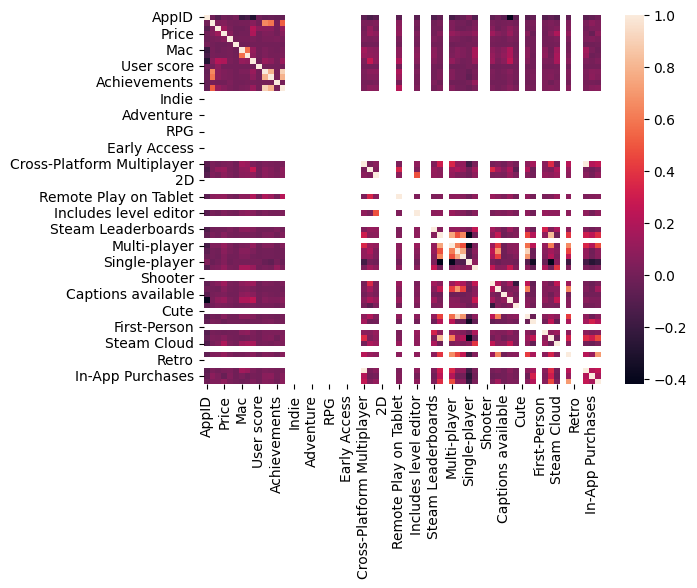

In [162]:
sns.heatmap(c.corr().round(2))

# end Exprirement for funciton to check

In [53]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Positive,Negative,Achievements,Recommendations,Developers,Publishers,Categories,Genres,Tags,Remove
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,6,11,30,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",False
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,53,5,12,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",False
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,50,8,17,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",False
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,87,49,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",False


In [54]:
#code to remove base on true or false and moving to a new df
games_test_clean_genre = games[games['Remove'] == False]

In [55]:
genre_count2 = {}

#breakdown of Genres for games_test3

for genre in games_test_clean_genre['Genres']:
      genres = genre.split(",")
      for genre in genres:
        genre_count2[genre] = genre_count2.get(genre, 0) + 1


In [56]:
# what is left after
genre_count2

{'Casual': 23638,
 'Indie': 42610,
 'Sports': 2844,
 'Action': 25553,
 'Adventure': 23331,
 'Free to Play': 3403,
 'Massively Multiplayer': 1509,
 'RPG': 10487,
 'Strategy': 11840,
 'Simulation': 11709,
 'Early Access': 6958,
 'Racing': 2302}

In [57]:
genre_count2.keys()

dict_keys(['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy', 'Simulation', 'Early Access', 'Racing'])


These will be added as a column each with temp value of true false, later to be converted to into 1 and zero.

In [58]:
#sample df to test new function
games_test = games_test_clean_genre.copy()

# Function for adding columns

In [59]:
def add_columns(dataframe, column_names):
      for col_name in column_names:
        dataframe[col_name] = 0
      return dataframe

In [60]:
#using the diction key to get the column to be added.
columns_to_add = list(genre_count2.keys())

In [61]:
#genres
columns_to_add

['Casual',
 'Indie',
 'Sports',
 'Action',
 'Adventure',
 'Free to Play',
 'Massively Multiplayer',
 'RPG',
 'Strategy',
 'Simulation',
 'Early Access',
 'Racing']

In [62]:
output = add_columns(games_test, columns_to_add)

 # End function for adding

In [63]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58622 entries, 0 to 78580
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AppID                  58622 non-null  int64  
 1   Name                   58622 non-null  object 
 2   Release date           58622 non-null  object 
 3   Estimated owners       58622 non-null  object 
 4   Peak CCU               58622 non-null  int64  
 5   Required age           58622 non-null  int64  
 6   Price                  58622 non-null  float64
 7   DLC count              58622 non-null  int64  
 8   Windows                58622 non-null  bool   
 9   Mac                    58622 non-null  bool   
 10  Linux                  58622 non-null  bool   
 11  Metacritic score       58622 non-null  int64  
 12  User score             58622 non-null  int64  
 13  Positive               58622 non-null  int64  
 14  Negative               58622 non-null  int64  
 15  Ac

# Tags review

In [64]:
tag_count2 = {}

#breakdown of Genres for games_test_clean_genre


for genre in games_test_clean_genre['Tags']:
      genres = genre.split(",")
      for genre in genres:
        tag_count2[genre] = tag_count2.get(genre, 0) + 1

In [65]:
tag_count2

{'Indie': 37888,
 'Casual': 25621,
 'Sports': 3045,
 'Bowling': 36,
 'Action': 26788,
 'Pixel Graphics': 8434,
 '2D': 16123,
 'Retro': 5971,
 'Arcade': 7135,
 'Score Attack': 1723,
 'Minimalist': 3486,
 'Comedy': 3851,
 'Singleplayer': 30410,
 'Fast-Paced': 1589,
 'Funny': 6244,
 'Parody': 403,
 'Difficult': 5038,
 'Gore': 3051,
 'Violent': 3407,
 'Western': 246,
 'Controller': 3715,
 'Blood': 395,
 '2D Platformer': 3565,
 'Atmospheric': 10347,
 'Surreal': 1582,
 'Mystery': 3407,
 'Puzzle': 10644,
 'Survival': 4382,
 'Adventure': 25050,
 'Linear': 3054,
 'Experimental': 1079,
 'Platformer': 5944,
 'Precision Platformer': 1251,
 'Puzzle-Platformer': 2614,
 'Stylized': 3820,
 'Physics': 3438,
 'Time Manipulation': 388,
 'Nudity': 2422,
 'Sexual Content': 2492,
 'Story Rich': 8314,
 'Turn-Based Combat': 2004,
 'Massively Multiplayer': 1566,
 'Multiplayer': 7391,
 'RPG': 11164,
 'Tactical RPG': 858,
 'Exploration': 7053,
 'PvP': 3059,
 'MMORPG': 401,
 'Turn-Based Strategy': 2232,
 'God Gam

# Categories

In [66]:
cate_count2 = {}

#breakdown of Genres for games_test3

for genre in games_test_clean_genre['Categories']:
      genres = genre.split(",")
      for genre in genres:
        cate_count2[genre] = cate_count2.get(genre, 0) + 1

In [67]:
cate_count2

{'Single-player': 56132,
 'Multi-player': 12129,
 'Steam Achievements': 29531,
 'Partial Controller Support': 8302,
 'Full controller support': 12997,
 'Steam Leaderboards': 5760,
 'Remote Play on Phone': 750,
 'Remote Play on Tablet': 905,
 'Remote Play on TV': 2039,
 'MMO': 823,
 'PvP': 7432,
 'Online PvP': 5252,
 'Co-op': 6056,
 'Online Co-op': 3260,
 'In-App Purchases': 1371,
 'Steam Cloud': 15577,
 'Steam Trading Cards': 9403,
 'Shared/Split Screen': 4618,
 'Cross-Platform Multiplayer': 1814,
 'Remote Play Together': 5134,
 'Stats': 3054,
 'Shared/Split Screen PvP': 3304,
 'Captions available': 1066,
 'Steam Workshop': 1607,
 'Includes level editor': 1662,
 'LAN PvP': 509,
 'LAN Co-op': 445,
 'Shared/Split Screen Co-op': 2641,
 'Steam Turn Notifications': 84,
 'VR Support': 230,
 'SteamVR Collectibles': 39,
 'Valve Anti-Cheat enabled': 124,
 'Includes Source SDK': 46,
 'Commentary available': 207,
 'Mods': 2,
 'Mods (require HL2)': 1,
 'Tracked Controller Support': 104,
 'VR Only'

# breaking down data to top hitters

# Code to plot dictionaries Values

In [68]:
#sorting dictionary
def sort_dict(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(50)) #changed to 50 to sort one thing
    return count_dict

In [69]:
test = sort_dict(tag_count2)

# Code to merge cate and tags

In [70]:
top25_cate = sort_dict(cate_count2)
top25_cate.most_common(25)

[('Single-player', 56132),
 ('Steam Achievements', 29531),
 ('Steam Cloud', 15577),
 ('Full controller support', 12997),
 ('Multi-player', 12129),
 ('Steam Trading Cards', 9403),
 ('Partial Controller Support', 8302),
 ('PvP', 7432),
 ('Co-op', 6056),
 ('Steam Leaderboards', 5760),
 ('Online PvP', 5252),
 ('Remote Play Together', 5134),
 ('Shared/Split Screen', 4618),
 ('Shared/Split Screen PvP', 3304),
 ('Online Co-op', 3260),
 ('Stats', 3054),
 ('Shared/Split Screen Co-op', 2641),
 ('Remote Play on TV', 2039),
 ('Cross-Platform Multiplayer', 1814),
 ('Includes level editor', 1662),
 ('Steam Workshop', 1607),
 ('In-App Purchases', 1371),
 ('Captions available', 1066),
 ('Remote Play on Tablet', 905),
 ('MMO', 823)]

In [71]:
test.most_common(25)

[('Indie', 37888),
 ('Singleplayer', 30410),
 ('Action', 26788),
 ('Casual', 25621),
 ('Adventure', 25050),
 ('2D', 16123),
 ('Strategy', 12794),
 ('Simulation', 12458),
 ('RPG', 11164),
 ('Puzzle', 10644),
 ('Atmospheric', 10347),
 ('3D', 8763),
 ('Pixel Graphics', 8434),
 ('Early Access', 8411),
 ('Story Rich', 8314),
 ('Colorful', 8034),
 ('Multiplayer', 7391),
 ('Cute', 7332),
 ('Arcade', 7135),
 ('Exploration', 7053),
 ('First-Person', 6966),
 ('Fantasy', 6947),
 ('Funny', 6244),
 ('Shooter', 6164),
 ('Retro', 5971)]

In [72]:
#converting top 25 category and tags to prep for merging
top25_tags = list(test.most_common(25))
top24_cat = list(top25_cate.most_common(25))

In [73]:
cat_tags = list(set(top24_cat + top25_tags))

In [74]:
cat_tags = dict(cat_tags)

In [75]:
cat_tags = sort_dict(cat_tags)

In [ ]:
cat_tags.most_common()

[('Single-player', 58728),
 ('Indie', 39109),
 ('Singleplayer', 32468),
 ('Steam Achievements', 30780),
 ('Action', 27943),
 ('Casual', 26830),
 ('Adventure', 26197),
 ('2D', 17185),
 ('Steam Cloud', 16295),
 ('Full controller support', 13630),
 ('Strategy', 13364),
 ('Simulation', 13035),
 ('Multi-player', 12560),
 ('RPG', 11701),
 ('Puzzle', 11223),
 ('Atmospheric', 10967),
 ('3D', 9733),
 ('Steam Trading Cards', 9466),
 ('Pixel Graphics', 9008),
 ('Early Access', 8885),
 ('Story Rich', 8842),
 ('Colorful', 8713),
 ('Partial Controller Support', 8628),
 ('Cute', 7895),
 ('Exploration', 7740),
 ('Multiplayer', 7704),
 ('PvP', 7686),
 ('Arcade', 7609),
 ('First-Person', 7486),
 ('Fantasy', 7451),
 ('Funny', 6602),
 ('Shooter', 6489),
 ('Co-op', 6326),
 ('Retro', 6299),
 ('Steam Leaderboards', 5912),
 ('Online PvP', 5443),
 ('Remote Play Together', 5301),
 ('Shared/Split Screen', 4792),
 ('Online Co-op', 3437),
 ('Shared/Split Screen PvP', 3409),
 ('Stats', 3139),
 ('Shared/Split Screen

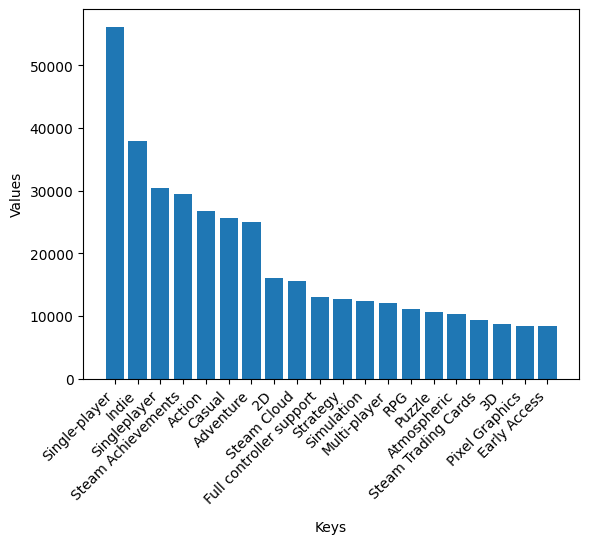

<Figure size 2000x600 with 0 Axes>

In [92]:
#category and tags top 20
plot_dict_bar2(cat_tags)

In [77]:
genre_count2

{'Casual': 23638,
 'Indie': 42610,
 'Sports': 2844,
 'Action': 25553,
 'Adventure': 23331,
 'Free to Play': 3403,
 'Massively Multiplayer': 1509,
 'RPG': 10487,
 'Strategy': 11840,
 'Simulation': 11709,
 'Early Access': 6958,
 'Racing': 2302}

In [78]:
type(genre_count2)

dict

In [79]:
#turn dictionary to a counter object to merge
count_dict2 = Counter(dict(genre_count2))

In [80]:
type(count_dict2)

collections.Counter

In [81]:
count_dict2.most_common()

[('Indie', 42610),
 ('Action', 25553),
 ('Casual', 23638),
 ('Adventure', 23331),
 ('Strategy', 11840),
 ('Simulation', 11709),
 ('RPG', 10487),
 ('Early Access', 6958),
 ('Free to Play', 3403),
 ('Sports', 2844),
 ('Racing', 2302),
 ('Massively Multiplayer', 1509)]

In [82]:
cat_tags.most_common()

[('Single-player', 56132),
 ('Indie', 37888),
 ('Singleplayer', 30410),
 ('Steam Achievements', 29531),
 ('Action', 26788),
 ('Casual', 25621),
 ('Adventure', 25050),
 ('2D', 16123),
 ('Steam Cloud', 15577),
 ('Full controller support', 12997),
 ('Strategy', 12794),
 ('Simulation', 12458),
 ('Multi-player', 12129),
 ('RPG', 11164),
 ('Puzzle', 10644),
 ('Atmospheric', 10347),
 ('Steam Trading Cards', 9403),
 ('3D', 8763),
 ('Pixel Graphics', 8434),
 ('Early Access', 8411),
 ('Story Rich', 8314),
 ('Partial Controller Support', 8302),
 ('Colorful', 8034),
 ('PvP', 7432),
 ('Multiplayer', 7391),
 ('Cute', 7332),
 ('Arcade', 7135),
 ('Exploration', 7053),
 ('First-Person', 6966),
 ('Fantasy', 6947),
 ('Funny', 6244),
 ('Shooter', 6164),
 ('Co-op', 6056),
 ('Retro', 5971),
 ('Steam Leaderboards', 5760),
 ('Online PvP', 5252),
 ('Remote Play Together', 5134),
 ('Shared/Split Screen', 4618),
 ('Shared/Split Screen PvP', 3304),
 ('Online Co-op', 3260),
 ('Stats', 3054),
 ('Shared/Split Screen

In [83]:
fin_add_col= list(set(cat_tags.most_common()+ count_dict2.most_common()))

In [84]:
fin_add_col =dict(fin_add_col)

In [85]:
fin_add_col = Counter(dict(fin_add_col))

In [86]:
len(fin_add_col.most_common())

54

In [87]:
use_this_list_for_test = dict(fin_add_col)
test_col = list(use_this_list_for_test.keys())
test_col

['Atmospheric',
 'First-Person',
 'Singleplayer',
 'PvP',
 'Multi-player',
 'Shooter',
 'Action',
 'Steam Workshop',
 'Steam Trading Cards',
 'Fantasy',
 'Cross-Platform Multiplayer',
 'Remote Play Together',
 'Cute',
 'Online Co-op',
 'Casual',
 'Steam Cloud',
 'Racing',
 'Strategy',
 'Simulation',
 'Free to Play',
 'Stats',
 'Full controller support',
 'Early Access',
 'In-App Purchases',
 'Shared/Split Screen',
 'Indie',
 'Adventure',
 'Co-op',
 'Retro',
 'Puzzle',
 'Online PvP',
 'Massively Multiplayer',
 'Sports',
 'Single-player',
 'Steam Leaderboards',
 'MMO',
 '2D',
 'Pixel Graphics',
 'Captions available',
 'Remote Play on Tablet',
 'Remote Play on TV',
 'Colorful',
 'Arcade',
 'Shared/Split Screen Co-op',
 'Multiplayer',
 'Story Rich',
 'Funny',
 'RPG',
 'Includes level editor',
 'Partial Controller Support',
 'Shared/Split Screen PvP',
 'Exploration',
 '3D',
 'Steam Achievements']

# end code to merge tags and cate

In [88]:
#plotting Categories with data sorting
def plot_dict_bar2(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(20))
    #
    keys = updated_dict.keys()
    values = updated_dict.values()

    plt.bar(keys, values)
    plt.xlabel('Keys', labelpad=10)
    plt.ylabel('Values')
    #adjust some layouts
    plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
    plt.figure(figsize=(20,6))

    plt.show()

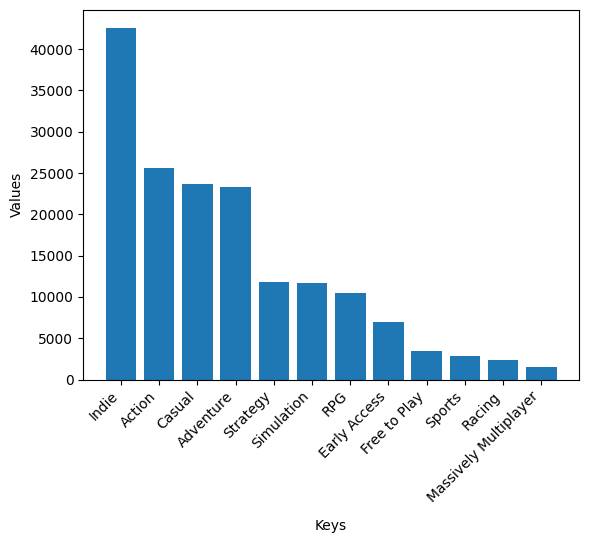

<Figure size 2000x600 with 0 Axes>

In [89]:
# Genres
plot_dict_bar2(genre_count2)

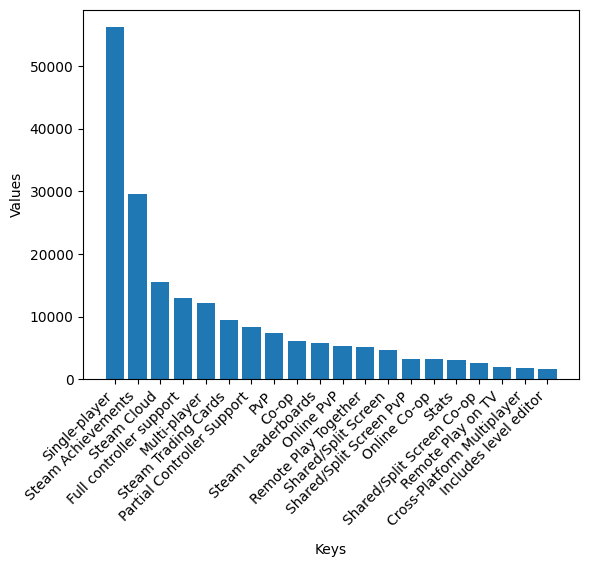

<Figure size 2000x600 with 0 Axes>

In [90]:
#categories
plot_dict_bar2(cate_count2)


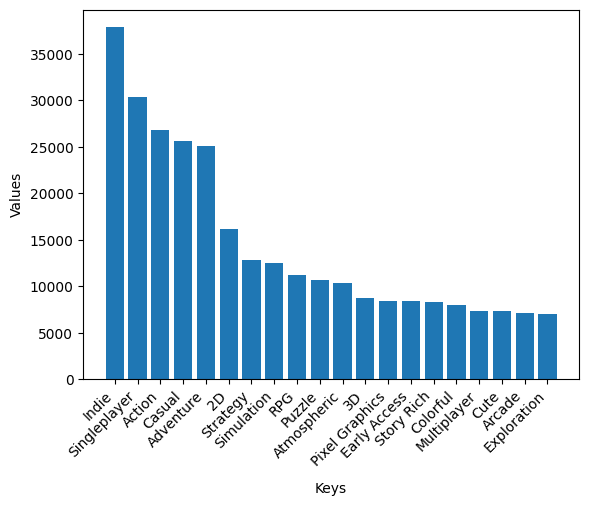

<Figure size 2000x600 with 0 Axes>

In [91]:
#Tags
plot_dict_bar2(tag_count2)

For categories, I'm going to just look at the following games that have:

* Single-Player
* Muli-player
* controller Support (Full or Partial)




# end experiment